In [101]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
a=tf.constant(2,dtype=np.int64)
b=tf.constant(5,dtype=np.int64)

In [103]:
a,b 

(<tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=5>)

In [104]:
a+b #no need of making computation graph

<tf.Tensor: shape=(), dtype=int64, numpy=7>

In [105]:
type(a.numpy())

numpy.int64

In [106]:
a.numpy()

2

In [107]:
a*b

<tf.Tensor: shape=(), dtype=int64, numpy=10>

In [108]:
tf.multiply(a,b)

<tf.Tensor: shape=(), dtype=int64, numpy=10>

In [109]:
#same thing tf.multiply and *

In [110]:
t=tf.constant(np.random.randint(5,10,(5,5)),name="shivam")

In [111]:
t #this time we didnt passed a scaler value

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[6, 5, 9, 6, 8],
       [9, 9, 8, 8, 6],
       [9, 9, 5, 9, 8],
       [9, 9, 7, 7, 6],
       [5, 9, 7, 7, 9]])>

In [112]:
a_matrix=tf.constant([[1,2],[3,4]])
b_matrix=tf.constant([[5,6],[7,8]])
b_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 6],
       [7, 8]])>

In [113]:
a_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

In [114]:
tf.matmul(a_matrix,b_matrix) #a dot b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]])>

In [115]:
#we cannot reassign values of constants

In [116]:
#a.assign(8) #can't reassign it

In [117]:
#Variables are mutable and can be updates and reassigned new values.

In [118]:
var=tf.Variable(3,dtype=np.int64)

In [119]:
var.assign(40000) #possible now

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=40000>

In [120]:
v=np.array([127],dtype=np.int8)

In [121]:
v+1

array([-128], dtype=int8)

In [122]:
var.numpy()

40000

In [123]:
# we can also create multi dim Variables
d=tf.Variable(np.random.randn(3,1)) 
#automatically assign data type
d

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float64, numpy=
array([[ 0.5056    ],
       [-0.02987984],
       [-1.49229234]])>

In [124]:
k=tf.Variable(5)

In [125]:
j=k

In [126]:
j is k

True

In [127]:
k.assign(k+1)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>

In [128]:
j is k 

True

In [129]:
#j bhi change hogya jabki change sirf k mai kia hai

In [130]:
k

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=6>

In [131]:
var=tf.Variable(10.0)

In [132]:
print(var.numpy())
print(var.assign_add(1).numpy()) #assign krdo by adding in previous value
print(var.assign_sub(5).numpy())

10.0
11.0
6.0


In [133]:
mat=tf.Variable(np.random.randint(0,100,(10,10)))

In [134]:
mat

<tf.Variable 'Variable:0' shape=(10, 10) dtype=int32, numpy=
array([[14, 55, 10, 46, 92, 47, 38,  1, 12, 96],
       [ 0,  0, 52,  7, 48, 48, 57, 10, 90, 74],
       [74, 89, 38, 36, 11, 73, 11, 51, 76, 79],
       [40, 77, 84, 44, 34, 15, 16, 37, 14, 81],
       [15, 64, 72, 19, 12, 35, 49, 38, 49, 30],
       [24,  4, 96, 89, 83, 66, 75, 54, 34, 59],
       [47, 39, 16, 49, 81, 43, 96, 78,  2, 86],
       [53, 65, 87, 85, 21, 88, 84, 77, 22, 79],
       [93, 27, 27, 17, 47, 55, 34, 51, 68,  4],
       [85, 21, 25,  9, 36, 99, 19, 82, 54,  3]])>

In [135]:
tf.reduce_max(mat,axis=1)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([96, 90, 89, 84, 72, 96, 96, 88, 93, 99])>

In [136]:
 op1=tf.add(a,b)
op1

<tf.Tensor: shape=(), dtype=int64, numpy=7>

In [137]:
a+b #same thing

<tf.Tensor: shape=(), dtype=int64, numpy=7>

In [138]:
v=a+b
u=v+2
w=v*u
z=w*3
z

<tf.Tensor: shape=(), dtype=int64, numpy=189>

In [139]:
#now lets see how a computation graph can 
#be built, although tensorflow do all of 
#those computatuions but still lets go deep.

In [140]:
#@tf.function is a very useful module that can be used to convert simple
#python functions int a highly optimized
#computation graph

In [141]:
@tf.function #means its a computation graph
def func(a,b):
    z=tf.multiply(a,b,name='z')
    y1=tf.constant(3,name='3')
    y2=tf.constant(4)
    w1=tf.add(z,y1,name='w1')
    w2=tf.add(z,y2,name='w2')
    
    return w1+w2

In [142]:
p=tf.Variable(10)
q=tf.Variable(20)
func(p,q)

<tf.Tensor: shape=(), dtype=int32, numpy=407>

In [143]:
#calculating gradient

In [144]:
with tf.GradientTape() as tape:
    w=tf.Variable(10,dtype=tf.float32)
    out=(w*w)+10*w
print(out)
grad=tape.gradient(out,w) #differntiating w.r.t w
print(grad.numpy())

tf.Tensor(200.0, shape=(), dtype=float32)
30.0


In [145]:
#tensorflow has most of th numpy functions
#like exp ,using tf.exp(power)
#lets play with this

In [146]:
with tf.GradientTape() as tape:
    w=tf.Variable(10,dtype=tf.float32)
    v=tf.Variable(5,dtype=tf.float32)
    out=(w*w)+10*v
grad=tape.gradient(out,[w,v]) #differntiating w.r.t v and w seperately
print(grad)

[<tf.Tensor: shape=(), dtype=float32, numpy=20.0>, <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]


In [147]:
def op(w):
    k=tf.constant(5,dtype=tf.float32)
    square_w=(w*w)+k
    another=square_w*square_w
    return another

for i in range(10):
    with tf.GradientTape() as tape:
        w=tf.Variable(i,dtype=tf.float32)
        out=op(w)
        grad=tape.gradient(out,w) #differntiating w.r.t v and w seperately
        print(grad.numpy())
    

0.0
24.0
72.0
168.0
336.0
600.0
984.0
1512.0
2208.0
3096.0


In [148]:
#gradient of sigmoid function

In [149]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

In [150]:
#define a variable
x=tf.Variable(0.)

#record the gradient
with tf.GradientTape() as tape:
    sig=sigmoid(x)
    res=tape.gradient(sig,x).numpy()
print(res)

0.25


In [151]:
#define a variable
x=tf.Variable(np.linspace(-20,20,30),dtype="float64")

#record the gradient
with tf.GradientTape() as tape:
    sig=sigmoid(x)
    res=tape.gradient(sig,x).numpy()

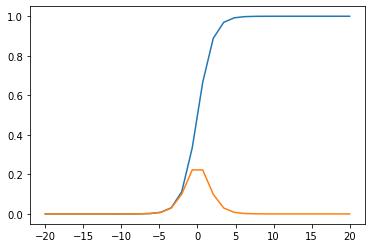

In [152]:
plt.plot(x.numpy(),sig.numpy())
plt.plot(x.numpy(),res)

In [153]:
#Linear Regression using tensorflow

In [154]:
from sklearn.datasets import make_regression

In [155]:
X,y=make_regression(n_samples=100,n_features=1,random_state=42,noise=5)
X=tf.constant(X.flatten(),dtype=np.float64)
y=tf.constant(y,dtype=np.float64)

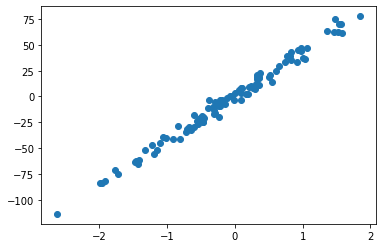

In [156]:
plt.scatter(X,y)

In [157]:
#W is the coefficeint and b is the biased term
W=tf.Variable(0.,dtype=np.float64)
b=tf.Variable(0.,dtype=np.float64)
#humesha random hi dalte koi , w aur b 
#apne aap adjust hojate hai through gradient descent

In [158]:
train_steps=300
learning_rate=0.1

In [161]:
@tf.function
def train_on_batch(X,y):
    with tf.GradientTape() as tape:
        yhat=X*W+b
        
        error=yhat-y
        loss=tf.reduce_mean(error**2)
    
    dW,db=tape.gradient(loss,[W,b])
    
    W.assign_sub(dW*learning_rate)
    b.assign_sub(db*learning_rate)
    
    return loss

In [162]:
for i in range(train_steps):
    loss=train_on_batch(X,y)
    
    if i%20==0:
        print("Loss at step {:03d}: {:.3f}".format(i,loss))
        
print(f'W:{W.numpy()}, b={b.numpy()} ')

Loss at step 000: 1550.677
Loss at step 020: 20.917
Loss at step 040: 19.515
Loss at step 060: 19.514
Loss at step 080: 19.514
Loss at step 100: 19.514
Loss at step 120: 19.514
Loss at step 140: 19.514
Loss at step 160: 19.514
Loss at step 180: 19.514
Loss at step 200: 19.514
Loss at step 220: 19.514
Loss at step 240: 19.514
Loss at step 260: 19.514
Loss at step 280: 19.514
W:43.08913515356642, b=0.5825576602634834 


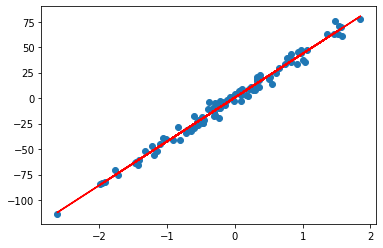

In [164]:
loss=train_on_batch(X,y)
plt.scatter(X,y)
plt.plot(X,b+W*X,color="red") #regression line